/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  def _init_dates(self, dates=None, freq=None):
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  def _init_dates(self, dates=None, freq=None):
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  def _init_dates(self, dates=None, freq=None):
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: No

,arima_m,arima_q,var_m,var_q,ardl,simple_avg
index,,,,,,
0,0.197019,0.274353,0.213991,0.125096,0.059059,0.130481
1,0.130584,0.154649,0.249997,0.150889,0.153882,0.159999
2,0.090595,0.103845,0.367597,0.128173,0.174380,0.135410
3,0.070626,0.077069,0.312167,0.202152,0.212927,0.125059
4,0.080309,0.085214,0.375532,0.187864,0.143362,0.127719
5,0.070608,0.077669,0.331945,0.204129,0.191207,0.124442
6,0.063267,0.067628,0.240625,0.153959,0.360923,0.113599
7,0.051937,0.054632,0.325995,0.119979,0.350950,0.096507


,arima_m,arima_q,var_m,var_q,ardl_q,simple_avg,weighted_avg
2024-09-30,82.201038,87.336339,89.091073,83.806010,85.210325,85.528957,80.864621
2024-12-31,80.921068,89.568827,91.667313,85.096030,83.991843,86.249016,73.975105
2025-03-31,80.376935,90.439852,92.942098,85.130706,82.576726,86.293263,73.435165
2025-06-30,81.315888,91.433144,93.991812,85.403979,84.767388,87.382442,70.323402
2025-09-30,80.310246,91.801567,94.962595,85.817197,81.051519,86.788625,77.140434
2025-12-31,79.923993,91.928882,95.946692,86.060981,76.182403,86.008590,72.902935
2026-03-31,80.763229,92.994824,96.934597,86.391786,72.821169,85.981121,57.791629
2026-06-30,79.982069,93.981578,97.934004,86.739491,74.864426,86.700314,59.988522


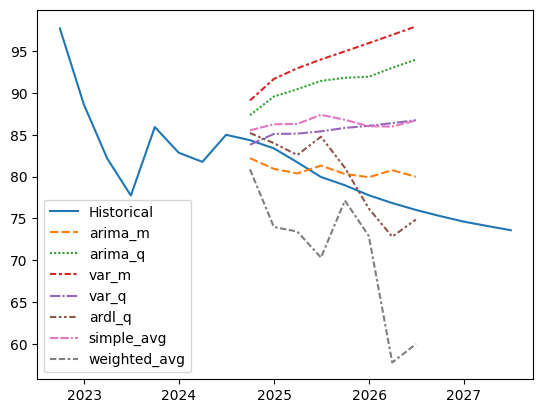

In [4]:
#packages needed for this script
%pip install pandas==2.0.3
import pandas as pd #package for data handling
%pip install numpy==1.25.2
import numpy as np #package for default arithmetic
%pip install statsmodels==0.13.5
import statsmodels as tsa #package for time series econometric models
%pip install matplotlib==3.7.1
import matplotlib as plt #package for plotting graph
%pip install seaborn==0.12.2
import seaborn as sns #package for plotting nicer graph
from statsmodels.tsa.vector_ar.var_model import VAR #package for VAR model
from statsmodels.tsa.vector_ar.vecm import VECM #package for VECM model
from statsmodels.regression.linear_model import OLS as ols #package for ols
from statsmodels.tsa.ardl import ARDL #package for ARDL modeling


#############################################################################################################################################################################################################################


#functions needed for the script
# function to log selected columns
def transform_log(df, columns_to_log):
  df = df.copy()
  for i in columns_to_log:
    df[i] = df[i].transform(np.log)

  return df

# function to difference selected columns
def transform_diff(df, columns_to_diff):
  df = df.copy()
  for key in columns_to_diff:
    df[key] = df[key].diff(columns_to_diff[key])

  return df

# Function to invert log transformation
def invert_log(logged_df, columns_to_log):
  logged_df = logged_df.copy()

  for i in columns_to_log:
    logged_df[i] = logged_df[i].apply(np.exp)

  return logged_df

# function to invert differenced columns
def invert_diff(original_df, differenced_df, columns_to_diff):
    original_df = original_df.copy()
    differenced_df = differenced_df.copy()

    for key in columns_to_diff:
      print("Column: " + key)
      first_invert = original_df[key].shift(columns_to_diff[key]) + differenced_df[key]
      differenced_df[key] = first_invert

    return differenced_df


#############################################################################################################################################################################################################################


#code to read original data
path = "/content/brent_fcstdata.xlsx"
sheet_q = "fcst_q"
sheet_m = 'fcst_m'
data_q = pd.read_excel(path, sheet_name = sheet_q, index_col = 'Date')
data_m = pd.read_excel(path, sheet_name = sheet_m, index_col = 'Date')

#determine the forecast horizon
horizon_q = 8
horizon_m = 24

#determine future index
index_m = pd.date_range(start='2024-07-01', periods=horizon_m, freq='M')
index_q = pd.date_range(start='2024-09-30', periods=horizon_q, freq='Q-DEC')

#code to create specific dataframe for testing purposes to ensure no changes to original dataframe
df_q = pd.DataFrame(data_q['brent']).copy(deep = True).dropna()


##############################################################################################################################################################################################################################


#code to run random walk model
#determine variable to be used
#rw_q_y = 'brent'

#determine start and end date of the fitted data
#rw_q_start = '1990-01-01'
#rw_q_end = '2024-06-30'

#code to create specific dataframe for testing purposes to ensure no changes to original dataframe
#df_rw_q = pd.DataFrame(data_q[rw_q_y]).copy(deep = True).loc[rw_q_start:rw_q_end].dropna()

#code to run model
#rw_q = arima(df_rw_q, order=(1, 0, 0))

#code to obtain forecasts
#rw_q_forecast = rw_q.fit().forecast(steps=horizon_q)


##############################################################################################################################################################################################################################


#code to run ARIMA monthly model
#determine variable to be used
arima_m_y = 'brent'

#determine start and end date of the fitted data
arima_m_start = '1990-01-01'
arima_m_end = '2024-06-30'

#code to create specific dataframe for testing purposes to ensure no changes to original dataframe
df_arima_m = pd.DataFrame(data_m[arima_m_y]).copy(deep = True).loc[arima_m_start:arima_m_end].dropna()

#code to transform the dataframe into desired data
arima_m_to_log = [arima_m_y]
df_arima_m_log = transform_log(df_arima_m, arima_m_to_log)

#code to set ARIMA parameters for monthly, S represents seasonality
ar_m = 9
i_m = 1
ma_m = 10
sar_m = 0
si_m = 0
sma_m = 0
seasons_m = 12

#code to run model
arima_m = arima(df_arima_m_log, order=(ar_m, i_m, ma_m), seasonal_order=(sar_m, si_m, sma_m, seasons_m))

#code to obtain forecasts
arima_m_forecast = np.exp(arima_m.fit().forecast(steps=horizon_m))


##############################################################################################################################################################################################################################


#code to run ARIMA quarterly model
#determine variable to be used
arima_q_y = 'brent'

#determine start and end date of the fitted data
arima_q_start = '1990-01-01'
arima_q_end = '2024-06-30'

#code to create specific dataframe for testing purposes to ensure no changes to original dataframe
df_arima_q = pd.DataFrame(data_q[arima_q_y]).copy(deep = True).loc[arima_q_start:arima_q_end].dropna()
df_arima_m = pd.DataFrame(data_m[arima_q_y]).copy(deep = True).loc[arima_q_start:arima_q_end].dropna()

#code to transform the dataframe into desired data
arima_q_to_log = [arima_q_y]
df_arima_q_log = transform_log(df_arima_q, arima_q_to_log)
arima_q_to_diff = {arima_q_y:1}
df_arima_q_logdiff = transform_diff(df_arima_q_log, arima_q_to_diff).dropna()

#code to set ARIMA parameters for quarterly, S represents seasonality
ar_q = 1
i_q = 1
ma_q = 2
sar_q = 1
si_q = 0
sma_q = 1
seasons_q = 4

#code to run model
arima_q = arima(df_arima_q_logdiff, order=(ar_q, i_q, ma_q), seasonal_order=(sar_q, si_q, sma_q, seasons_q))

#code to obtain forecasts
arima_q_forecast = invert_log(pd.concat([df_arima_q_log.iloc[-1:,0].to_frame(name=arima_q_y), arima_q.fit().forecast(steps=horizon_q).to_frame(name=arima_q_y)]).cumsum(), arima_q_to_log)[arima_q_y][1:]


##############################################################################################################################################################################################################################


#code to run VAR monthly model
#determine variable to be used
var_m_y = 'brent'
var_m_x = ['substitute', 'invdiff', 'balance']
var_m_all = [var_m_y] + var_m_x

#determine start and end date of the fitted data
var_m_start = '1990-01-01'
var_m_end = '2024-06-30'

#determine the VAR model lags
var_m_lags = 3

#code to create specific dataframe for modeling purposes to ensure no changes to original dataframe
df_var_m_y = pd.DataFrame(data_m[var_m_y]).copy(deep = True).loc[var_m_start:var_m_end].dropna()
df_var_m_x = pd.DataFrame(data_m[var_m_x]).copy(deep = True).loc[var_m_start:var_m_end].dropna()
df_var_m_all = pd.DataFrame(data_m[var_m_all]).copy(deep = True).loc[var_m_start:var_m_end].dropna()

#code to transform the dataframe into desired data
var_m_to_log = ['brent', 'substitute']
var_m_to_diff = {'brent':1, 'substitute':1, 'invdiff':1, 'balance':1}
var_m_to_diff_y = {'brent':1}
var_m_to_log_y = ['brent']
df_var_m_all_log = transform_log(df_var_m_all, var_m_to_log)
df_var_m_all_logdiff = transform_diff(df_var_m_all_log, var_m_to_diff).dropna()

#code to run model
var_m = VAR(endog=df_var_m_all_logdiff)
var_m_fit = var_m.fit(var_m_lags)

#code to obtain forecasts
var_m_forecast = invert_log(pd.concat([df_var_m_all_log.iloc[-1:,0].to_frame(name=var_m_y), pd.DataFrame(var_m_fit.forecast(steps=horizon_m, y=var_m.endog), columns=var_m.endog_names, index=index_m)[var_m_y].to_frame(name=var_m_y)]).cumsum(), var_m_to_log_y)[var_m_y][1:]


##############################################################################################################################################################################################################################


#code to run VAR quarterly model
#determine variable to be used
var_q_y = 'brent'
var_q_x = ['substitute', 'invdiff', 'balance']
var_q_all = [var_q_y] + var_q_x

#determine start and end date of the fitted data
var_q_start = '1990-01-01'
var_q_end = '2024-06-30'

#determine the VAR model lags
var_q_lags = 2

#code to create specific dataframe for modeling purposes to ensure no changes to original dataframe
df_var_q_y = pd.DataFrame(data_m[var_q_y]).copy(deep = True).loc[var_q_start:var_q_end].dropna()
df_var_q_x = pd.DataFrame(data_m[var_q_x]).copy(deep = True).loc[var_q_start:var_q_end].dropna()
df_var_q_all = pd.DataFrame(data_m[var_q_all]).copy(deep = True).loc[var_q_start:var_q_end].dropna()

#code to transform the dataframe into desired data
var_q_to_log = ['brent', 'substitute']
var_q_to_diff = {'brent':1, 'invdiff':1, 'substitute':1, 'balance':1}
var_q_to_diff_y = {'brent':1}
var_q_to_log_y = ['brent']
df_var_q_all_log = transform_log(df_var_q_all, var_q_to_log)
df_var_q_all_logdiff = transform_diff(df_var_q_all_log, var_q_to_diff).dropna()

#code to run model
var_q = VAR(endog=df_var_q_all_logdiff)
var_q_fit = var_q.fit(var_q_lags)

#code to obtain forecasts
var_q_forecast = invert_log(pd.concat([df_var_q_all_log.iloc[-1:,0].to_frame(name=var_q_y), pd.DataFrame(var_q_fit.forecast(steps=horizon_q, y=var_q.endog), columns=var_q.endog_names, index=index_q)[var_q_y].to_frame(name=var_q_y)]).cumsum(), var_q_to_log_y)[var_q_y][1:]


##############################################################################################################################################################################################################################


#code to run VECM monthly model
#determine variable to be used
#vecm_m_y = 'brent'
#vecm_m_x = ['substitute', 'inventory']
#vecm_m_all = [vecm_m_y] + vecm_m_x

#determine start and end date of the fitted data
#vecm_m_start = '1990-01-01'
#vecm_m_end = '2024-06-30'

#determine the VAR model lags
#vecm_m_lags = 3
#vecm_m_terms = "co"
#vecm_m_coin_terms = 0
#vecm_m_coint = 1

#code to create specific dataframe for modeling purposes to ensure no changes to original dataframe
#df_vecm_m_y = pd.DataFrame(data_m[vecm_m_y]).copy(deep = True).loc[vecm_m_start:vecm_m_end].dropna()
#df_vecm_m_x = pd.DataFrame(data_m[vecm_m_x]).copy(deep = True).loc[vecm_m_start:vecm_m_end].dropna()
#df_vecm_m_all = pd.DataFrame(data_m[vecm_m_all]).copy(deep = True).loc[vecm_m_start:vecm_m_end].dropna()

#code to transform the dataframe into desired data
#vecm_m_to_log = ['brent', 'substitute']
#vecm_m_to_log_y = ['brent']
#df_vecm_m_all_log = transform_log(df_vecm_m_all, vecm_m_to_log)

#code to run model
#vecm_m = VECM(endog=df_vecm_m_all_log, deterministic=vecm_m_terms, k_ar_diff=vecm_m_lags, coint_rank=vecm_m_coint)

#code to obtain forecasts
#vecm_m_forecast = invert_log(pd.DataFrame(vecm_m.fit().predict(steps=horizon_m), columns=vecm_m.endog_names, index=index_m)[vecm_m_y].to_frame(name=vecm_m_y), vecm_m_to_log_y)[vecm_m_y]


##############################################################################################################################################################################################################################


#code to run VECM quarterly model
#determine variable to be used
#vecm_q_y = 'brent'
#vecm_q_x = ['balance', 'substitute', 'invdiff']
#vecm_q_all = [vecm_q_y] + vecm_q_x

#determine start and end date of the fitted data
#vecm_q_start = '1990-01-01'
#vecm_q_end = '2024-06-30'

#determine the VAR model lags
#vecm_q_lags = 1
#vecm_q_terms = "co"
#vecm_q_coin_terms = 0
#vecm_q_coint = 1

#code to create specific dataframe for modeling purposes to ensure no changes to original dataframe
#df_vecm_q_y = pd.DataFrame(data_q[vecm_q_y]).copy(deep = True).loc[vecm_q_start:vecm_q_end].dropna()
#df_vecm_q_x = pd.DataFrame(data_q[vecm_q_x]).copy(deep = True).loc[vecm_q_start:vecm_q_end].dropna()
#df_vecm_q_all = pd.DataFrame(data_q[vecm_q_all]).copy(deep = True).loc[vecm_q_start:vecm_q_end].dropna()

#code to transform the dataframe into desired data
#vecm_q_to_log = ['brent', 'substitute']
#vecm_q_to_log_y = ['brent']
#df_vecm_q_all_log = transform_log(df_vecm_q_all, vecm_q_to_log)

#code to run model
#vecm_q = VECM(endog=df_vecm_q_all_log, deterministic=vecm_q_terms, k_ar_diff=vecm_q_lags, coint_rank=vecm_q_coint)

#code to obtain forecasts
#vecm_q_forecast = invert_log(pd.DataFrame(vecm_q.fit().predict(steps=horizon_q), columns=vecm_q.endog_names, index=index_q)[vecm_q_y].to_frame(name=vecm_q_y), vecm_q_to_log_y)[vecm_q_y]


##############################################################################################################################################################################################################################


#code to set up OLS model for forecast
#determine variable to be used
#ols_q_y = 'brent'
#ols_q_x = ['invdiff', 'season1', 'season2', 'season3', 'season4']
#ols_q_all = [ols_q_y] + ols_q_x

#determine start and end date of the fitted data
#ols_q_start = '2000-12-01'
#ols_q_end = '2024-06-30'

#determine start and end date of the future data
#ols_q_f_start = '2024-04-01'
#ols_q_f_end = '2026-03-31'

#code to create specific dataframe for modeling purposes to ensure no changes to original dataframe
#df_ols_q_y = pd.DataFrame(data_q[ols_q_y]).copy(deep = True).loc[ols_q_start:ols_q_end].dropna()
#df_ols_q_x = pd.DataFrame(data_q[ols_q_x]).copy(deep = True).loc[ols_q_start:ols_q_end].dropna()
#df_ols_q_f_x = pd.DataFrame(data_q[ols_q_x]).copy(deep = True).loc[ols_q_f_start:ols_q_f_end].dropna()

#code to transform the dataframe into desired data
#ols_q_to_log_y = ['brent']
#df_ols_q_y_log = transform_log(df_ols_q_y, ols_q_to_log_y)
#ols_q_to_log_x = ['substitute', 'inventory']
#df_ols_q_x_log = transform_log(df_ols_q_x, ols_q_to_log_x)

#code to run model
#ols_q = ols(endog=df_ols_q_y_log, exog=df_ols_q_x, hasconst=True)

#code to obtain forecasts
#ols_q_forecast = invert_log(ols_q.fit(cov_type="HAC", cov_kwds={'maxlags':4, 'use_correction':True}, use_t = True).predict(df_ols_q_f_x).to_frame(name=ols_q_y), ols_q_to_log_y)[ols_q_y]


##############################################################################################################################################################################################################################


#code to set up ARDL model for forecast
#determine variable to be used
ardl_q_y = 'brent'
ardl_q_x = ['substitute', 'inventory', 'balance', 'invdiff']
ardl_q_all = [ardl_q_y] + ardl_q_x

#determine start and end date of the fitted data
ardl_q_start = '2008-12-01'
ardl_q_end = '2024-06-30'

#determine start and end date of the future data
ardl_q_f_start = '2024-07-01'
ardl_q_f_end = '2027-06-30'

#determine the lags of the ARDL model, ar_lags=lags of dependent variable, dl_lags=lags of independent variable
ar_lags = [1]
dl_lags = {'substitute': [0], 'inventory': [0], 'balance':[0]}
modeltrend='c'
seasons = True

#code to create specific dataframe for modeling purposes to ensure no changes to original dataframe
df_ardl_q_y = pd.DataFrame(data_q[ardl_q_y]).copy(deep = True).loc[ardl_q_start:ardl_q_end].dropna()
df_ardl_q_x = pd.DataFrame(data_q[ardl_q_x]).copy(deep = True).loc[ardl_q_start:ardl_q_end].dropna()
df_ardl_q_f_x = pd.DataFrame(data_q[ardl_q_x]).copy(deep = True).loc[ardl_q_f_start:ardl_q_f_end].dropna()

#code to transform the dataframe into desired data
ardl_q_to_log_y = ['brent']
df_ardl_q_y_log = transform_log(df_ardl_q_y, ardl_q_to_log_y)
ardl_q_to_log_x = ['substitute', 'inventory']
df_ardl_q_x_log = transform_log(df_ardl_q_x, ardl_q_to_log_x)

#code to run model
ardl_q = ARDL(endog=df_ardl_q_y_log, lags=ar_lags, exog=df_ardl_q_x, order=dl_lags, trend=modeltrend, seasonal=seasons)

#code to obtain forecasts
ardl_q_forecast = invert_log(ardl_q.fit(cov_type="HAC", cov_kwds={'maxlags':4, 'use_correction':True}, use_t = True).forecast(steps=horizon_q, exog=df_ardl_q_f_x).to_frame(name=ardl_q_y), ardl_q_to_log_y)[ardl_q_y]


##############################################################################################################################################################################################################################


#code to merge all forecasts into one dataframe
all_forecast = pd.concat([arima_m_forecast.to_frame(name='arima_m').groupby([arima_m_forecast.index.year, arima_m_forecast.index.quarter]).mean(),
                          arima_q_forecast.to_frame(name='arima_q').groupby([arima_q_forecast.index.year, arima_q_forecast.index.quarter]).mean(),
                          var_m_forecast.to_frame(name='var_m').groupby([var_m_forecast.index.year, var_m_forecast.index.quarter]).mean(),
                          var_q_forecast.to_frame(name='var_q').groupby([var_q_forecast.index.year, var_q_forecast.index.quarter]).mean(),
                          ardl_q_forecast.to_frame(name='ardl_q').groupby([ardl_q_forecast.index.year, ardl_q_forecast.index.quarter]).mean()],axis=1).reset_index(drop=True).set_index(index_q)
all_forecast['simple_avg'] = all_forecast.mean(axis=1)

#code to read weights data
path = "/content/accuracy.xlsx"
weights = pd.read_excel(path, sheet_name = 'weights', index_col = 'index')
display(weights)

#code to create combined forecast and merge into the forecast dataframe
all_forecast['weighted_avg'] = (all_forecast.reset_index(drop=True)*weights).sum(axis=1).to_frame().reset_index(drop=True).set_index(index_q)
print()
display(all_forecast)
print()

#code to plot the forecast and historical
plotobject = pd.concat([df_q['brent'].iloc[-20:].to_frame(name="Historical"), all_forecast], axis=1)
sns.lineplot(plotobject)

#code to save forecasts into excel
all_forecast.to_excel("brent_forecast_26062024.xlsx")

